The network was created using the spearman correlation with a threshold of 0.5. Also, the p-values where adjusted using de Benjamini-Hochberg procedure with a false discovery rate of 10%.

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import sklearn.preprocessing
import sklearn.decomposition
import seaborn as sns
from scipy import stats as st
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [0]:
W = pd.read_csv("weighted_adjacency_matrix.csv", sep=",")
A = pd.read_csv("adjacency_matrix.csv", sep=",")

In [0]:
W = W.iloc[0:,1:]
A = A.iloc[0:,1:]

In [0]:
W.columns = [f"G{i}" for i in list(range(0,W.shape[0]))]
W.index = [f"G{i}" for i in list(range(0,W.shape[0]))]

In [0]:
A.columns = [f"G{i}" for i in list(range(0,A.shape[0]))]
A.index = [f"G{i}" for i in list(range(0,A.shape[0]))]

In [0]:
W = np.absolute(W)

## Preliminary Analysis

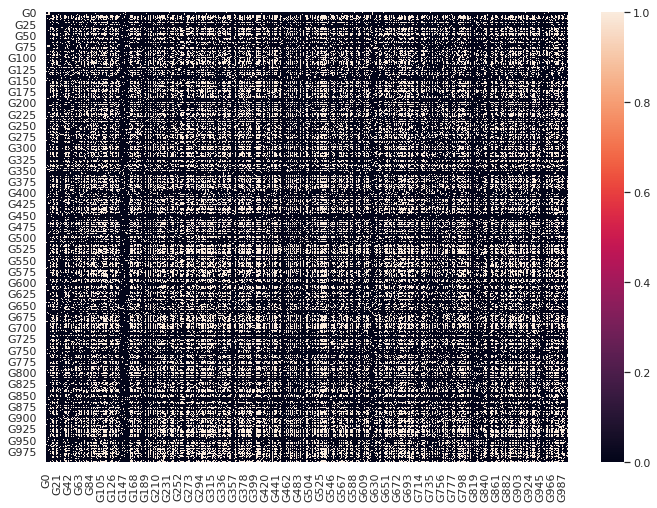

In [0]:
sns.heatmap(A.iloc[0:1000,0:1000])

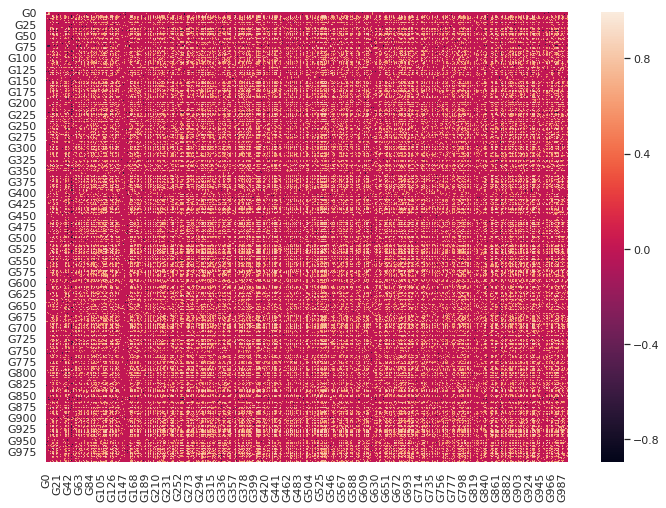

In [0]:
sns.heatmap(W.iloc[0:1000,0:1000])

**Network Analysis**

In [0]:
def check_symmetric(a, rtol=1e-05, atol=1e-08):
    return np.allclose(a, a.T, rtol=rtol, atol=atol)

In [0]:
print(check_symmetric(A))
print(check_symmetric(W))

True
True


In [0]:
import plotly.plotly as py
import plotly.graph_objs as go
import networkx as nx

In [0]:
a=np.absolute(W.values.flatten())

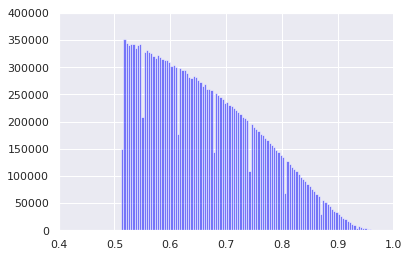

In [0]:
from matplotlib import pyplot as plt 
import numpy as np  
    
plt.xlim(0.4, 1)
plt.ylim(0, 400000)
x = a
num_bins = 250
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
plt.show()


## Creating Sub-Networks

N: Network
z: Normalized expression vectors
A: Adjacency matrix
W: Weigthed adjacency matrix
nis: network genes indices
njs: 

In [0]:
def modularity(N, W, A, n):
  
  w_int = 0
  w_ext = 0
  nis = N[n]
  njs = list(set(range(0, A.shape[0])) - set(nis))
  
  for i in nis:
    for j in nis:
      if A.iloc[i,j] != 0:
        w_int = w_int + W.iloc[i,j]
    w_int = w_int/2
    
  for i in nis:
    for j in njs:
      if A.iloc[i,j] != 0:
        w_ext = w_ext + W.iloc[i,j]
  
  return w_int/(1.0 + (w_int + w_ext)**2)

In [0]:
z = pd.read_csv("data.csv", sep=",", index_col = 0)

In [0]:
N = [[]] * W.shape[0]
seed_gene = 3

In [0]:
mod = list(set(range(0, A.shape[0])) - {seed_gene})

In [0]:
neig = []

for i in range(0,len(mod)):
  if mod[i] == 1:
    neig.append(i)

[0, 1, 2, 4, 5, 6, 7, 8, 9, 10]

In [0]:
N = [[0]]
N[0].extend([1])

0.3110453761208997

In [0]:
modularity(N, W, A)

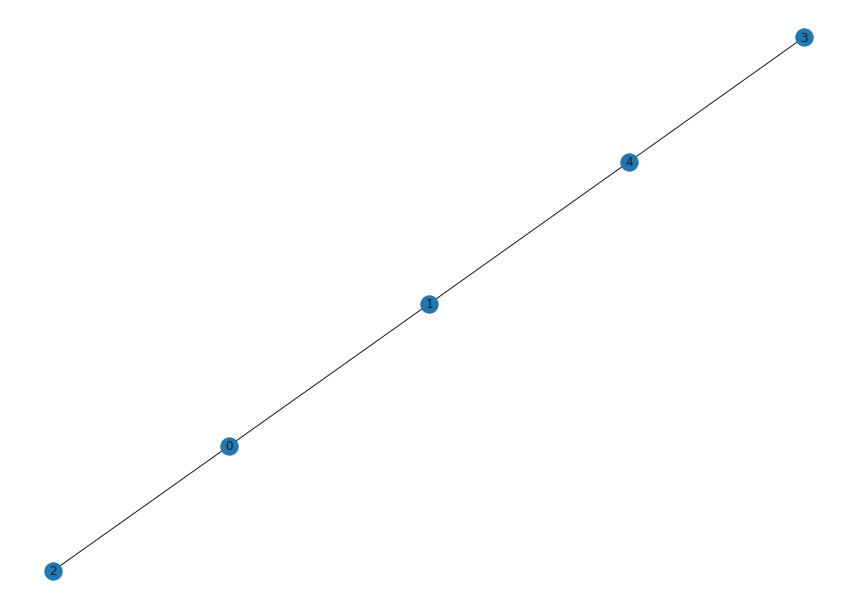

In [0]:
G = nx.from_numpy_matrix(np.array(A.iloc[0:5,0:5])) 
nx.draw(G, with_labels=True)

Las subredes que resulten son las que van a ser usadas para entrenar los modelos. Falta el codigo que genera la red. La función para calcular la modularidad ya está lista. El modelo que me toca a mí entrenar (en el grupo)